In [1]:
#importing the  useful library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style('whitegrid')


In [4]:
#reading the dataset

In [5]:
dataset=pd.read_csv('Eluvio_DS_Challenge.csv')

In [6]:
dataset.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [7]:
#collecting the relevant information from the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [8]:
#checking if any column has same data or nor throughout the dataset

In [9]:
#priting the no of different types of values in a column
print(dataset['down_votes'].value_counts())
print(dataset['over_18'].value_counts())
print(dataset['author'].value_counts())
print(dataset['category'].value_counts())

0    509236
Name: down_votes, dtype: int64
False    508916
True        320
Name: over_18, dtype: int64
davidreiss666     8897
anutensil         5730
DoremusJessup     5037
maxwellhill       4023
igeldard          4013
                  ... 
esgendeng            1
RoadBikeDalek        1
WinningAllYear       1
Gremanrailyway       1
moridin007           1
Name: author, Length: 85838, dtype: int64
worldnews    509236
Name: category, dtype: int64


In [10]:
#dropping the category and downvotes as they have same value throughout the dataset.
dataset.drop(columns=["down_votes","category"], axis = 1, inplace = True)

In [11]:
dataset['time_created'] = pd.to_datetime(dataset['time_created'], unit='s')
dataset['date_created'] = pd.to_datetime(dataset['date_created'])
dataset['day'] = dataset['date_created'].dt.day_name()
dataset['year'] = dataset['date_created'].dt.year
dataset['month'] = dataset['date_created'].dt.month

Text(0.5, 1.0, 'Num of news vs Day of Week')

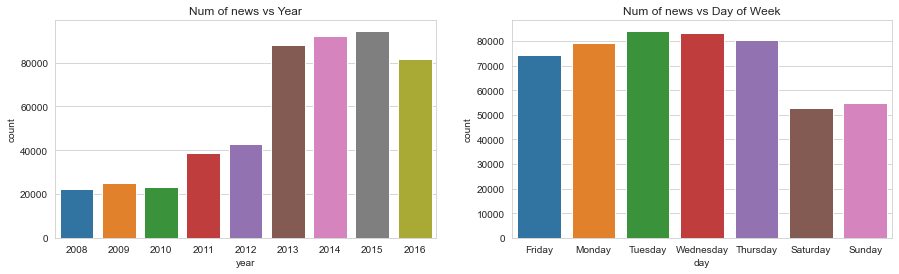

In [12]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
g=sns.countplot(x='year',data=dataset,ax=ax[0])
g.set_title('Num of news vs Year')
g=sns.countplot(x='day',data=dataset,ax=ax[1])
g.set_title('Num of news vs Day of Week')

Text(0.5, 1.0, 'Average up_votes vs Day of Week')

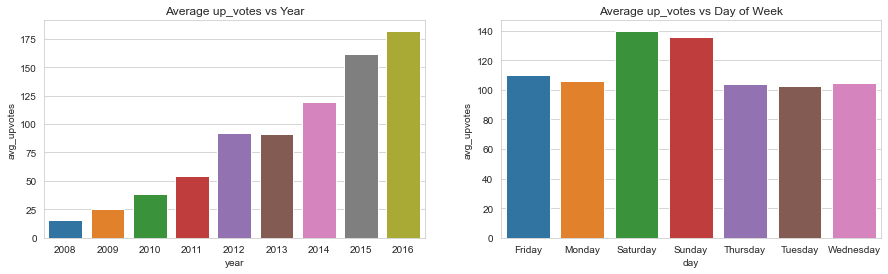

In [13]:
f, ax = plt.subplots(1, 2, figsize=(15, 4))
set1 = dataset.groupby('year').mean()['up_votes'].reset_index(name='avg_upvotes')
g = sns.barplot(x='year',y='avg_upvotes',data=set1, ax=ax[0])
g.set_title('Average up_votes vs Year')
set2 = dataset.groupby('day').mean()['up_votes'].reset_index(name='avg_upvotes')
g = sns.barplot(x='day',y='avg_upvotes',data=set2, ax=ax[1])
g.set_title("Average up_votes vs Day of Week")

In [14]:
#text preprocess 
#1.removing the punctuations
#2.tekenization
#3.lemmatization and stemming

In [15]:
#importing the regular expression library to remove punctuations and below we are defining a function to remove punctuation by using python
import re

def clean_document(document):
    """Cleaning the  document by removing unnecessary punctuation.It removes
    any extra periods and merges acronyms to prevent the tokenizer from
    splitting a false sentence
    """
    document = re.sub('[^A-Za-z0-9 \']', '', document)
    document = re.sub("\'s", "", document)
    document = document.replace("New York Times", "NewYorkTimes")
    document = document.replace('U of', 'University of')
    document = document.replace('U S', 'US').replace('U N', 'UN')
    
    # Remove extra whitespace
    document = ' '.join(document.split())
    return document

In [16]:
#here we are applying the clean document function to the topic of the dataset so that we can catch the unique word from the topic
docs = [clean_document(doc) for doc in dataset['title']]

In [17]:
print(dataset['title'])

0                         Scores killed in Pakistan clashes
1                          Japan resumes refuelling mission
2                           US presses Egypt on Gaza border
3              Jump-start economy: Give health care to all 
4           Council of Europe bashes EU&UN terror blacklist
                                ...                        
509231     Heil Trump : Donald Trump s  alt-right  white...
509232    There are people speculating that this could b...
509233            Professor receives Arab Researchers Award
509234    Nigel Farage attacks response to Trump ambassa...
509235    Palestinian wielding knife shot dead in West B...
Name: title, Length: 509236, dtype: object


In [18]:
pip install -U gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Tokenize the documents with the help of stopwords these are words which do not tell much about the sense of the sentence so they are less important so remove them.
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove stop words.
docs = [[token for token in doc if not token in STOPWORDS] for doc in docs]

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1 ] for doc in docs]


C:\Users\sanja\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [20]:
import nltk
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

docs = [[stemmer.stem(lemmatizer.lemmatize(token)) for token in doc] for doc in docs]

In [22]:
#running LDA with the help of bag of words
#bag of words representation
#Choose the number of topics using topic coherence score
#Fit the LDA model with the chosen number of topics


In [23]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Bag-of-words representation of the documents.
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

In [24]:
# Choose the number of topics 
from gensim.models import LdaMulticore, CoherenceModel

# Topics range
min_topics = 5
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

coherence_score = []
model_list = []
for k in topics_range:
    model = LdaMulticore(bow_corpus, num_topics=k, id2word=dictionary)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_score.append(coherence_model.get_coherence())

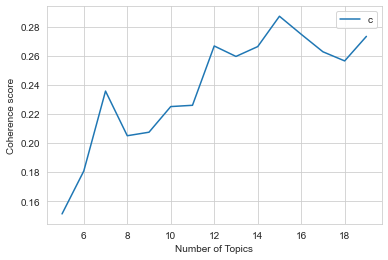

In [25]:
plt.plot(topics_range, coherence_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence scores"), loc='best')
plt.show()

In [26]:
lda_model = model_list[np.argmax(coherence_score)]

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.036*"kill" + 0.026*"attack" + 0.016*"dead" + 0.011*"report" + 0.010*"peopl" + 0.010*"bomb" + 0.010*"syria" + 0.010*"polic" + 0.008*"forc" + 0.007*"milit"


Topic: 1 
Words: 0.015*"israel" + 0.014*"right" + 0.013*"human" + 0.012*"palestinian" + 0.010*"say" + 0.010*"gaza" + 0.008*"isra" + 0.008*"drone" + 0.007*"war" + 0.007*"leader"


Topic: 2 
Words: 0.009*"law" + 0.008*"woman" + 0.007*"court" + 0.007*"presid" + 0.007*"time" + 0.006*"abus" + 0.006*"pope" + 0.006*"say" + 0.006*"right" + 0.005*"gay"


Topic: 3 
Words: 0.008*"attack" + 0.008*"strike" + 0.007*"olymp" + 0.006*"kill" + 0.005*"china" + 0.005*"libya" + 0.005*"russian" + 0.004*"bangladesh" + 0.004*"air" + 0.004*"tunisia"


Topic: 4 
Words: 0.027*"minist" + 0.012*"prime" + 0.009*"presid" + 0.008*"court" + 0.007*"year" + 0.007*"sentenc" + 0.007*"charg" + 0.006*"leader" + 0.006*"said" + 0.006*"say"


Topic: 5 
Words: 0.013*"kill" + 0.012*"news" + 0.009*"crash" + 0.009*"plane" + 0.008*"polic" + 0.008*"bomb" + 0.00

In [27]:
#3 Topic chain over 2016
#Fit a LDA model for news titles of every month in 2016
#Measure the similarity between topics using Hellinger distance
#Find long and short term topics in 2016

In [29]:
model_month = []
for m in range(1,13):
    corpus_by_month = [bow_corpus[i] for i in range(len(docs)) if dataset['year'][i]== 2016 and dataset['month'][i] == m]
    model_by_month = LdaMulticore(corpus_by_month, num_topics=7, id2word=dictionary)
    model_month.append(model_by_month)

In [30]:
from gensim.matutils import hellinger

thresh = 0.3
chain = np.full((11, 7), None)
metric = np.ones([11,7])
for m in range(1,12):
    for cur in range(7):
        for pre in range(7):
            dis = hellinger(model_month[m].get_topics()[cur], model_month[m-1].get_topics()[pre])
            if dis < min(thresh,metric[m-1][cur]):
                metric[m-1][cur] = dis
                chain[m-1][cur] = pre

In [31]:
chain

array([[2, 1, 5, 5, 5, 2, 5],
       [3, 5, 1, 0, 5, 6, 5],
       [6, 4, 6, 4, 2, 5, 6],
       [2, 5, 0, 4, 2, 2, 0],
       [1, 0, 0, 1, 3, 2, 0],
       [1, 1, 2, 4, 4, 6, 1],
       [1, 1, 1, 3, 1, 1, 1],
       [3, 3, 0, 0, 3, 0, 3],
       [6, 6, 4, 2, 0, 4, 4],
       [1, 2, 5, 2, 5, 5, 2],
       [None, None, None, None, None, None, None]], dtype=object)

In [32]:

print('Long term topic:')
print(model_month[1].print_topics()[2])
print(model_month[2].print_topics()[3])
print(model_month[3].print_topics()[2])
print(model_month[4].print_topics()[1])

print("\n")
print('Major events in a short time:')
print(model_month[9].print_topics()[5])

Long term topic:
(2, '0.003*"syria" + 0.003*"kill" + 0.003*"saudi" + 0.003*"world" + 0.003*"forc" + 0.002*"deal" + 0.002*"korea" + 0.002*"launch" + 0.002*"train" + 0.002*"new"')
(3, '0.004*"attack" + 0.003*"korea" + 0.003*"turkey" + 0.003*"kill" + 0.003*"pakistan" + 0.003*"missil" + 0.002*"nuclear" + 0.002*"test" + 0.002*"north" + 0.002*"world"')
(2, '0.005*"china" + 0.003*"say" + 0.003*"korea" + 0.003*"north" + 0.003*"attack" + 0.002*"south" + 0.002*"minist" + 0.002*"brussel" + 0.002*"india" + 0.002*"world"')
(1, '0.004*"new" + 0.004*"attack" + 0.003*"world" + 0.003*"death" + 0.003*"kill" + 0.002*"govern" + 0.002*"protest" + 0.002*"state" + 0.002*"say" + 0.002*"minist"')


Major events in a short time:
(5, '0.005*"russia" + 0.003*"uk" + 0.003*"china" + 0.003*"ban" + 0.003*"isi" + 0.002*"attack" + 0.002*"protest" + 0.002*"kill" + 0.002*"child" + 0.002*"forc"')
